In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
geocodeclean = pd.read_csv('../data/geocodeclean.csv')
geocodeclean

,address,lat,lng
0,1022 SEYMOUR AVE,36.185726,-86.750575
1,1310 EASTLAND AVE,36.183276,-86.745370
2,617 S 5TH ST,36.165976,-86.760884
3,2409 EMMETT AVE,36.195349,-86.747668
4,2930 DICKERSON PIKE,36.223448,-86.761631
...,...,...,...
18976,4140 CREEKWOOD N,36.216213,-86.845592
18977,923 16TH AVE N,36.166041,-86.800870
18978,2131 14TH AVE N,36.187328,-86.810324
18979,2417 HERMAN ST,36.162061,-86.813110


In [3]:
chartsclean = pd.read_csv('../data/charts_clean.csv')
chartsclean

,Month,Precinct,ASSIST EMS,DISORDERLY SUBJECT,DOMESTIC DISTURBANCE,INTOXICATED PERSON,MENTAL CONDITION,SUICIDAL PERSON,SUSPICIOUS PERSON,TRESPASSER,...,Priority_2L,Priority_2M,Priority_2N,Priority_2T,Priority_2R,Priority_3,Priority_3H,Priority_3M,Priority_3Q,Total Response
0,August,C,203,354,11,7,28,43,18,104,...,0,251,0,0,0,21,0,1,0,853
1,August,CMD1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,August,CW,3,8,0,0,1,1,1,3,...,0,17,0,0,0,0,0,0,0,19
3,August,E,91,187,56,3,13,16,44,33,...,0,126,0,0,0,12,0,2,0,531
4,August,H,190,310,64,5,28,31,69,68,...,0,190,0,0,0,32,0,4,0,955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,March,M,147,174,49,4,16,31,33,30,...,0,219,0,0,1,37,0,1,0,607
83,March,MT,149,199,31,7,10,21,53,49,...,0,217,0,0,0,11,0,0,0,659
84,March,N,122,209,35,1,24,26,34,53,...,0,139,0,0,0,33,0,3,0,623
85,March,S,198,286,59,3,27,29,42,66,...,0,220,0,0,0,40,0,0,0,946


In [4]:
callsclean = pd.read_csv('../data/calls_clean.csv')
callsclean

,Month,Precinct,Date,Created,Address,Incident Type,Priority
0,July,C,07-01-2021,01:57:16,639 LAFAYETTE ST,INTOXICATED PERSON,2
1,July,C,07-01-2021,03:02:52,920 BROADWAY,WELFARE CHECK,2
2,July,C,07-01-2021,05:44:47,110 4TH AVE S,DISORDERLY SUBJECT,2
3,July,C,07-01-2021,05:49:07,800 4TH AVE S,SUSPICIOUS PERSON,2
4,July,C,07-01-2021,08:01:06,1033 DEMONBREUN ST,TRESPASSER,2
...,...,...,...,...,...,...,...
47921,March,W,03-31-2022,11:46:52,3811 HILLSBORO PIKE,TRESPASSER,2
47922,March,W,03-31-2022,12:24:06,7277 CHARLOTTE PIKE,SUICIDAL PERSON,2
47923,March,W,03-31-2022,17:59:25,MURPHY RD / 42ND AVE N,DISORDERLY SUBJECT,2
47924,March,W,03-31-2022,20:31:47,2828 KENWAY RD,SUSPICIOUS PERSON,2


# merge callsclean and geocodetotal

In [5]:
geocalls = callsclean.merge(geocodeclean, how = 'outer', left_on = 'Address', right_on = 'address')
geocalls

,Month,Precinct,Date,Created,Address,Incident Type,Priority,address,lat,lng
0,July,C,07-01-2021,01:57:16,639 LAFAYETTE ST,INTOXICATED PERSON,2,639 LAFAYETTE ST,36.152611,-86.777416
1,July,C,07-01-2021,15:30:16,639 LAFAYETTE ST,ASSIST EMS,2,639 LAFAYETTE ST,36.152611,-86.777416
2,July,C,07-01-2021,16:39:59,639 LAFAYETTE ST,SUICIDAL PERSON,2,639 LAFAYETTE ST,36.152611,-86.777416
3,July,C,07-01-2021,20:53:41,639 LAFAYETTE ST,DISORDERLY SUBJECT,2,639 LAFAYETTE ST,36.152611,-86.777416
4,July,C,07-01-2021,23:23:27,639 LAFAYETTE ST,SUICIDAL PERSON,2,639 LAFAYETTE ST,36.152611,-86.777416
...,...,...,...,...,...,...,...,...,...,...
47921,March,W,03-31-2022,08:12:31,7835 COLEY DAVIS RD,WELFARE CHECK,2,7835 COLEY DAVIS RD,36.077602,-86.961839
47922,March,W,03-31-2022,10:29:52,1366 GENERAL GEORGE PATTON RD,ASSIST EMS,2,1366 GENERAL GEORGE PATTON RD,36.069643,-86.952478
47923,March,W,03-31-2022,17:59:25,MURPHY RD / 42ND AVE N,DISORDERLY SUBJECT,2,MURPHY RD / 42ND AVE N,36.140938,-86.837410
47924,March,W,03-31-2022,20:31:47,2828 KENWAY RD,SUSPICIOUS PERSON,2,2828 KENWAY RD,36.108774,-86.825368


# combine priority calls into 1,2,3 only

In [6]:
chartsclean['Priority_2'] = chartsclean['Priority_2'] + chartsclean['Priority_2L'] + chartsclean['Priority_2M'] + chartsclean['Priority_2N'] + chartsclean['Priority_2T'] + chartsclean['Priority_2R']


In [7]:
chartsclean['Priority_3'] = chartsclean['Priority_3'] + chartsclean['Priority_3H'] + chartsclean['Priority_3M'] + chartsclean['Priority_3Q']

In [8]:
chartsclean = chartsclean.drop(columns = ['Priority_2L', 'Priority_2M', 'Priority_2N', 'Priority_2T', 'Priority_2R', 'Priority_3H', 'Priority_3M', 'Priority_3Q'])

In [9]:
chartsclean

,Month,Precinct,ASSIST EMS,DISORDERLY SUBJECT,DOMESTIC DISTURBANCE,INTOXICATED PERSON,MENTAL CONDITION,SUICIDAL PERSON,SUSPICIOUS PERSON,TRESPASSER,WELFARE CHECK,Total Incidents,Priority_1,Priority_2,Priority_3,Total Response
0,August,C,203,354,11,7,28,43,18,104,85,853,2,829,22,853
1,August,CMD1,0,1,0,0,0,0,0,0,0,1,0,1,0,1
2,August,CW,3,8,0,0,1,1,1,3,2,19,0,19,0,19
3,August,E,91,187,56,3,13,16,44,33,88,531,0,517,14,531
4,August,H,190,310,64,5,28,31,69,68,190,955,0,919,36,955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,March,M,147,174,49,4,16,31,33,30,123,607,0,569,38,607
83,March,MT,149,199,31,7,10,21,53,49,140,659,0,648,11,659
84,March,N,122,209,35,1,24,26,34,53,119,623,0,587,36,623
85,March,S,198,286,59,3,27,29,42,66,236,946,1,905,40,946


# look at # of calls per 12hr shift, then graph

In [10]:
#concate Created and Date
#change into Date time
#group data into "bins" per shift

In [11]:
geocalls    

,Month,Precinct,Date,Created,Address,Incident Type,Priority,address,lat,lng
0,July,C,07-01-2021,01:57:16,639 LAFAYETTE ST,INTOXICATED PERSON,2,639 LAFAYETTE ST,36.152611,-86.777416
1,July,C,07-01-2021,15:30:16,639 LAFAYETTE ST,ASSIST EMS,2,639 LAFAYETTE ST,36.152611,-86.777416
2,July,C,07-01-2021,16:39:59,639 LAFAYETTE ST,SUICIDAL PERSON,2,639 LAFAYETTE ST,36.152611,-86.777416
3,July,C,07-01-2021,20:53:41,639 LAFAYETTE ST,DISORDERLY SUBJECT,2,639 LAFAYETTE ST,36.152611,-86.777416
4,July,C,07-01-2021,23:23:27,639 LAFAYETTE ST,SUICIDAL PERSON,2,639 LAFAYETTE ST,36.152611,-86.777416
...,...,...,...,...,...,...,...,...,...,...
47921,March,W,03-31-2022,08:12:31,7835 COLEY DAVIS RD,WELFARE CHECK,2,7835 COLEY DAVIS RD,36.077602,-86.961839
47922,March,W,03-31-2022,10:29:52,1366 GENERAL GEORGE PATTON RD,ASSIST EMS,2,1366 GENERAL GEORGE PATTON RD,36.069643,-86.952478
47923,March,W,03-31-2022,17:59:25,MURPHY RD / 42ND AVE N,DISORDERLY SUBJECT,2,MURPHY RD / 42ND AVE N,36.140938,-86.837410
47924,March,W,03-31-2022,20:31:47,2828 KENWAY RD,SUSPICIOUS PERSON,2,2828 KENWAY RD,36.108774,-86.825368


In [12]:
geocalls['newdate'] = geocalls['Date'] + ' ' + geocalls['Created']
geocalls['newdate']

0        07-01-2021 01:57:16
1        07-01-2021 15:30:16
2        07-01-2021 16:39:59
3        07-01-2021 20:53:41
4        07-01-2021 23:23:27
                ...         
47921    03-31-2022 08:12:31
47922    03-31-2022 10:29:52
47923    03-31-2022 17:59:25
47924    03-31-2022 20:31:47
47925    03-31-2022 22:30:34
Name: newdate, Length: 47926, dtype: object

In [13]:
geocalls['newdate'] = pd.to_datetime(geocalls['newdate'])

In [14]:
geocalls1 = geocalls.drop(columns = ['Date', 'Created'])
geocalls1

,Month,Precinct,Address,Incident Type,Priority,address,lat,lng,newdate
0,July,C,639 LAFAYETTE ST,INTOXICATED PERSON,2,639 LAFAYETTE ST,36.152611,-86.777416,2021-07-01 01:57:16
1,July,C,639 LAFAYETTE ST,ASSIST EMS,2,639 LAFAYETTE ST,36.152611,-86.777416,2021-07-01 15:30:16
2,July,C,639 LAFAYETTE ST,SUICIDAL PERSON,2,639 LAFAYETTE ST,36.152611,-86.777416,2021-07-01 16:39:59
3,July,C,639 LAFAYETTE ST,DISORDERLY SUBJECT,2,639 LAFAYETTE ST,36.152611,-86.777416,2021-07-01 20:53:41
4,July,C,639 LAFAYETTE ST,SUICIDAL PERSON,2,639 LAFAYETTE ST,36.152611,-86.777416,2021-07-01 23:23:27
...,...,...,...,...,...,...,...,...,...
47921,March,W,7835 COLEY DAVIS RD,WELFARE CHECK,2,7835 COLEY DAVIS RD,36.077602,-86.961839,2022-03-31 08:12:31
47922,March,W,1366 GENERAL GEORGE PATTON RD,ASSIST EMS,2,1366 GENERAL GEORGE PATTON RD,36.069643,-86.952478,2022-03-31 10:29:52
47923,March,W,MURPHY RD / 42ND AVE N,DISORDERLY SUBJECT,2,MURPHY RD / 42ND AVE N,36.140938,-86.837410,2022-03-31 17:59:25
47924,March,W,2828 KENWAY RD,SUSPICIOUS PERSON,2,2828 KENWAY RD,36.108774,-86.825368,2022-03-31 20:31:47


In [15]:
#extract hr from newdate

In [16]:
geocalls1['hours'] = geocalls1['newdate'].dt.hour
geocalls1

,Month,Precinct,Address,Incident Type,Priority,address,lat,lng,newdate,hours
0,July,C,639 LAFAYETTE ST,INTOXICATED PERSON,2,639 LAFAYETTE ST,36.152611,-86.777416,2021-07-01 01:57:16,1
1,July,C,639 LAFAYETTE ST,ASSIST EMS,2,639 LAFAYETTE ST,36.152611,-86.777416,2021-07-01 15:30:16,15
2,July,C,639 LAFAYETTE ST,SUICIDAL PERSON,2,639 LAFAYETTE ST,36.152611,-86.777416,2021-07-01 16:39:59,16
3,July,C,639 LAFAYETTE ST,DISORDERLY SUBJECT,2,639 LAFAYETTE ST,36.152611,-86.777416,2021-07-01 20:53:41,20
4,July,C,639 LAFAYETTE ST,SUICIDAL PERSON,2,639 LAFAYETTE ST,36.152611,-86.777416,2021-07-01 23:23:27,23
...,...,...,...,...,...,...,...,...,...,...
47921,March,W,7835 COLEY DAVIS RD,WELFARE CHECK,2,7835 COLEY DAVIS RD,36.077602,-86.961839,2022-03-31 08:12:31,8
47922,March,W,1366 GENERAL GEORGE PATTON RD,ASSIST EMS,2,1366 GENERAL GEORGE PATTON RD,36.069643,-86.952478,2022-03-31 10:29:52,10
47923,March,W,MURPHY RD / 42ND AVE N,DISORDERLY SUBJECT,2,MURPHY RD / 42ND AVE N,36.140938,-86.837410,2022-03-31 17:59:25,17
47924,March,W,2828 KENWAY RD,SUSPICIOUS PERSON,2,2828 KENWAY RD,36.108774,-86.825368,2022-03-31 20:31:47,20


In [17]:
geocalls1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47926 entries, 0 to 47925
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Month          47926 non-null  object        
 1   Precinct       47926 non-null  object        
 2   Address        47926 non-null  object        
 3   Incident Type  47926 non-null  object        
 4   Priority       47926 non-null  object        
 5   address        47926 non-null  object        
 6   lat            47926 non-null  float64       
 7   lng            47926 non-null  float64       
 8   newdate        47926 non-null  datetime64[ns]
 9   hours          47926 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 4.0+ MB


In [18]:
geocalls1.value_counts('hours').sort_index()

hours
0     1782
1     1501
2     1327
3     1089
4     1009
5      864
6     1047
7     1325
8     1567
9     1789
10    1969
11    2156
12    2197
13    2391
14    2570
15    2812
16    2894
17    2775
18    2871
19    2614
20    2594
21    2552
22    2224
23    2007
dtype: int64

In [19]:
# create lists for each shift category

Shift0 = ((geocalls1['hours'] >= 0) & (geocalls1['hours'] < 12))
Shift1 = ((geocalls1['hours'] >= 1) & (geocalls1['hours'] < 13))
Shift2 = ((geocalls1['hours'] >= 2) & (geocalls1['hours'] < 14))
Shift3 = ((geocalls1['hours'] >= 3) & (geocalls1['hours'] < 15))
Shift4 = ((geocalls1['hours'] >= 4) & (geocalls1['hours'] < 16))
Shift5 = ((geocalls1['hours'] >= 5) & (geocalls1['hours'] < 17))
Shift6 = ((geocalls1['hours'] >= 6) & (geocalls1['hours'] < 18))
Shift7 = ((geocalls1['hours'] >= 7) & (geocalls1['hours'] < 19))
Shift8 = ((geocalls1['hours'] >= 8) & (geocalls1['hours'] < 20))
Shift9 = ((geocalls1['hours'] >= 9) & (geocalls1['hours'] < 21))
Shift10 = ((geocalls1['hours'] >= 10) & (geocalls1['hours'] < 22))
Shift11 = ((geocalls1['hours'] >= 11) & (geocalls1['hours'] < 23))
Shift12 = (geocalls1['hours'] >= 12)
Shift13 = ((geocalls1['hours'] >= 13) | (geocalls1['hours'] <1))
Shift14 = ((geocalls1['hours'] >= 14) | (geocalls1['hours'] <2))
Shift15 = (geocalls1['hours'] >= 15) | (geocalls1['hours'] <3)
Shift16 = (geocalls1['hours'] >= 16) | (geocalls1['hours'] <4)
Shift17 = (geocalls1['hours'] >= 17) | (geocalls1['hours'] <5)
Shift18 = (geocalls1['hours'] >= 18) | (geocalls1['hours'] <6)
Shift19 = (geocalls1['hours'] >= 19) | (geocalls1['hours'] <7)
Shift20 = (geocalls1['hours'] >= 20) | (geocalls1['hours'] <8)
Shift21 = (geocalls1['hours'] >= 21) | (geocalls1['hours'] <9)
Shift22 = (geocalls1['hours'] >= 22) | (geocalls1['hours'] <10)
Shift23 = (geocalls1['hours'] >= 23) | (geocalls1['hours'] <11)


In [20]:
shift = ['Shift0', 'Shift1', 'Shift2', 'Shift3', 'Shift4', 'Shift5', 'Shift6', 'Shift7', 'Shift8', 'Shift9', 'Shift10', 'Shift11', 'Shift12', 'Shift13', 'Shift14', 'Shift15', 'Shift16', 'Shift17', 'Shift18', 'Shift19', 'Shift20', 'Shift21', 'Shift22', 'Shift23']
calls = [17425, 17840, 18730, 19973, 21696, 23581, 25492, 27316, 28605, 29632, 30395, 30650, 30501, 30086, 29196, 27953, 26230, 24345, 22434, 20610, 19321, 18294,  17531, 17276]

In [21]:
d = {'Shift' : shift, 'Calls': calls}

In [22]:
df = pd.DataFrame(d)
df

,Shift,Calls
0,Shift0,17425
1,Shift1,17840
2,Shift2,18730
3,Shift3,19973
4,Shift4,21696
5,Shift5,23581
6,Shift6,25492
7,Shift7,27316
8,Shift8,28605
9,Shift9,29632


<AxesSubplot:>

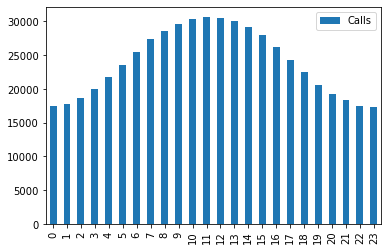

In [23]:
df.plot(kind = 'bar')

In [24]:
#SUM each shift

In [25]:
calls_shift0 = sum(Shift0)
calls_shift1 = sum(Shift1)
calls_shift2 = sum(Shift2)
calls_shift3 = sum(Shift3)
calls_shift4 = sum(Shift4)
calls_shift5 = sum(Shift5)
calls_shift6 = sum(Shift6)
calls_shift7 = sum(Shift7)
calls_shift8 = sum(Shift8)
calls_shift9 = sum(Shift9)
calls_shift10 = sum(Shift10)
calls_shift11 = sum(Shift11)
calls_shift12 = sum(Shift12)
calls_shift13 = sum(Shift13)
calls_shift14 = sum(Shift14)
calls_shift15 = sum(Shift15)
calls_shift16 = sum(Shift16)
calls_shift17 = sum(Shift17)
calls_shift18 = sum(Shift18)
calls_shift19 = sum(Shift19)
calls_shift20 = sum(Shift20)
calls_shift21 = sum(Shift21)
calls_shift22 = sum(Shift22)
calls_shift23 = sum(Shift23)


print(calls_shift0)
print(calls_shift1)
print(calls_shift2)
print(calls_shift3)
print(calls_shift4)
print(calls_shift5)
print(calls_shift6)
print(calls_shift7)
print(calls_shift8)
print(calls_shift9)
print(calls_shift10)
print(calls_shift11)
print(calls_shift12)
print(calls_shift13)
print(calls_shift14)
print(calls_shift15)
print(calls_shift16)
print(calls_shift17)
print(calls_shift18)
print(calls_shift19)
print(calls_shift20)
print(calls_shift21)
print(calls_shift22)
print(calls_shift23)


17425
17840
18730
19973
21696
23581
25492
27316
28605
29632
30395
30650
30501
30086
29196
27953
26230
24345
22434
20610
19321
18294
17531
17276


In [26]:
#use function to create categories

In [27]:
#incorrect
# def myFunc(i):
#     if (i['hours'] >= 1 & i['hours'] <13):
#         return '1'
#     elif (i['hours'] >= 2 & i['hours'] <14):
#         return '2'
#     elif (i['hours'] >= 3 & i['hours'] <15):
#         return '3'
#     elif (i['hours'] >= 4 & i['hours'] <16):
#         return '4'
#     elif (i['hours'] >= 5 & i['hours'] <17):
#         return '5'
#     elif (i['hours'] >= 6 & i['hours'] <18):
#         return '6'
#     elif (i['hours'] >= 7 & i['hours'] <19):
#         return '7'
#     elif (i['hours'] >= 8 & i['hours'] <20):
#         return '8'
#     elif (i['hours'] >= 9 & i['hours'] <21):
#         return '9'
#     elif (i['hours'] >= 10 & i['hours'] <22):
#         return '10'
#     elif (i['hours'] >= 11 & i['hours'] <23):
#         return '11'
#     else:
#         return '12'
    
# geocalls1['Shifts'] = geocalls1.apply(myFunc, axis=1)
# geocalls1.head()

In [28]:
# still incorrect.....

# def myFunc2(x):
#     if ((x >= 1) & (x <13)):
#         return 'Shift1'
#     if ((x >= 2) & (x <14)):
#         return 'Shift2'
#     if ((x >= 3) & (x <15)):
#         return 'Shift3'
#     if ((x >= 4) & (x <16)):
#         return 'Shift4'
#     if ((x >= 5) & (x <17)):
#         return 'Shift5'
#     if ((x >= 6) & (x <18)):
#         return 'Shift6'
#     if ((x >= 7) & (x <19)):
#         return 'Shift7'
#     if ((x >= 8) & (x <20)):
#         return 'Shift8'
#     if ((x >= 9) & (x <21)):
#         return 'Shift9'
#     if ((x >= 10) & (x <22)):
#         return 'Shift10'
#     if ((x >= 11) & (x <23)):
#         return 'Shift11'
#     if ((x >= 12) & (x < 0)):
#         return 'Shift12'
    
# geocalls1['Shifts'] = geocalls1['hours'].apply(myFunc2)
# geocalls1.head(50)

In [29]:
# geocalls1.value_counts('Shifts')

#turn defined function into for loop

In [30]:
# still not quite there
# for index, row in geocalls1.iterrows():
#     if ((row.hours >= 1) & (row.hours <13)):
#         geocalls1.loc[index, 'Shifts'] = geocalls1.loc[index, 'Shifts_1']
#     elif ((row.hours >= 2) & (row.hours <14)):
#         geocalls1.loc[index, 'Shifts'] = geocalls1.loc[index, 'Shift_2']
#     elif ((row.hours >= 3) & (row.hours <15)):
#         geocalls1.loc[index, 'Shifts'] = geocalls1.loc[index, 'Shift_3']
#     elif ((row.hours >= 4) & (row.hours <16)):
#         geocalls1.loc[index, 'Shifts'] = geocalls1.loc[index, 'Shift_4']
#     elif ((row.hours >= 5) & (row.hours <17)):
#         geocalls1.loc[index, 'Shifts'] = geocalls1.loc[index, 'Shift_5']
#     elif ((row.hours >= 6) & (row.hours <18)):
#         geocalls1.loc[index, 'Shifts'] = geocalls1.loc[index, 'Shift_6']
#     elif ((row.hours >= 7) & (row.hours <19)):
#         geocalls1.loc[index, 'Shifts'] = geocalls1.loc[index, 'Shift_7']
#     elif ((row.hours >= 8) & (row.hours <20)):
#         geocalls1.loc[index, 'Shifts'] = geocalls1.loc[index, 'Shift_8']
#     elif ((row.hours >= 9) & (row.hours <21)):
#         geocalls1.loc[index, 'Shifts'] = geocalls1.loc[index, 'Shift_9']
#     elif ((row.hours >= 10) & (row.hours <22)):
#         geocalls1.loc[index, 'Shifts'] = geocalls1.loc[index, 'Shift_10']
#     elif ((row.hours >= 11) & (row.hours <23)):
#         geocalls1.loc[index, 'Shifts'] = geocalls1.loc[index, 'Shift_11']
#     elif ((row.hours >=12) & (row.hours <0)):
#         geocalls1.loc[index, 'Shifts'] = geocalls1.loc[index, 'Shift_12']
#     else:
#         schools.loc[index, 'Shifts'] = -1
    
# geocalls.head()

In [31]:
#shifts = {'shift1: range() '}
# for index, row in geocalls1.iterrows():
#     if ((row.hours >= 0) & (row.hours <12)):
#         geocalls1.loc[index, 'Shifts'] = geocalls1.loc[index, 'Shift_0']
#     if ((row.hours >= 1) & (row.hours <13)):
#         geocalls1.loc[index, 'Shifts'] = geocalls1.loc[index, 'Shift_1']
#     elif ((row.hours >= 2) & (row.hours <14)):
#         geocalls1.loc[index, 'Shifts'] = geocalls1.loc[index, 'Shift_2']
#     elif ((row.hours >= 3) & (row.hours <15)):
#         geocalls1.loc[index, 'Shifts'] = geocalls1.loc[index, 'Shift_3']
#     elif ((row.hours >= 4) & (row.hours <16)):
#         geocalls1.loc[index, 'Shifts'] = geocalls1.loc[index, 'Shift_4']
#     elif ((row.hours >= 5) & (row.hours <17)):
#         geocalls1.loc[index, 'Shifts'] = geocalls1.loc[index, 'Shift_5']
#     elif ((row.hours >= 6) & (row.hours <18)):
#         geocalls1.loc[index, 'Shifts'] = geocalls1.loc[index, 'Shift_6']
#     elif ((row.hours >= 7) & (row.hours <19)):
#         geocalls1.loc[index, 'Shifts'] = geocalls1.loc[index, 'Shift_7']
#     elif ((row.hours >= 8) & (row.hours <20)):
#         geocalls1.loc[index, 'Shifts'] = geocalls1.loc[index, 'Shift_8']
#     elif ((row.hours >= 9) & (row.hours <21)):
#         geocalls1.loc[index, 'Shifts'] = geocalls1.loc[index, 'Shift_9']
#     elif ((row.hours >= 10) & (row.hours <22)):
#         geocalls1.loc[index, 'Shifts'] = geocalls1.loc[index, 'Shift_10']
#     elif ((row.hours >= 11) & (row.hours <23)):
#         geocalls1.loc[index, 'Shifts'] = geocalls1.loc[index, 'Shift_11']
#     elif ((row.hours >=12) & (row.hours <0)):
#         geocalls1.loc[index, 'Shifts'] = geocalls1.loc[index, 'Shift_12']
#     else:
#         schools.loc[index, 'Shifts'] = -1
    
# geocalls.head()

In [32]:
dic = {range(0, 12): 'Shift_1'}


In [33]:
geocalls1.value_counts('Shifts')

KeyError: 'Shifts'

In [ ]:
#groupby shifts, count incident type

In [ ]:
geocalls1['Shifts'] = geocalls1['Shifts'].astype(int)

In [ ]:
geocalls1.groupby('Shifts').count()

In [ ]:
geocalls1['Shifts'].count()

In [ ]:
pd.crosstab(geocalls1['Shifts'], geocalls1['Incident Type'])

In [ ]:
(pd.crosstab(geocalls1['Shifts'], geocalls1['Incident Type'], normalize = 'index') * 100).plot(kind = 'bar',
                                                                                              stacked = True,
                                                                                              edgecolor = 'black',
                                                                                              figsize = (10,6))
plt.title('Call Type By Shift')
plt.xticks(rotation = 0)
plt.legend(bbox_to_anchor = (1, 0.8), loc = 'upper left')

In [ ]:
groupshift = geocalls1.groupby('Shifts')['Incident Type'].count()
groupshift

In [ ]:
groupshift = pd.DataFrame(data = groupshift)
groupshift

In [ ]:
groupshift.plot(kind = 'bar',
               figsize = (10,6))

plt.xticks(rotation = 0,
          fontsize = 12)